In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import csv
from ast import literal_eval
import pandas as pd

In [2]:
data = pd.read_csv("n_Data.csv", sep=",")
data.head(5)

,type 0,type 1,type 2,type 3,type 4,type 5,type 6,type 7,type 8,type 9,...,type 30,type 31,type 32,type 33,type 34,type 35,type 36,type 37,type 38,type 39
0,13,6,4,9,8,11,9,18,18,11,...,171,170,184,182,198,175,183,208,212,227
1,14,12,18,14,35,26,21,34,37,21,...,39,28,45,69,52,65,67,74,90,83
2,7,8,38,10,26,32,14,15,13,25,...,63,66,63,64,61,57,72,80,81,86
3,5,7,9,9,4,5,10,12,17,20,...,15,31,32,41,25,27,31,49,65,93
4,26,3,21,22,22,32,7,16,20,29,...,51,50,62,58,54,55,96,137,127,163


In [3]:
seq = 10       # 예측할 seq 수

type = ["type %d"%i for i in range(data.shape[1])]

type_x = ["type %d"%i for i in range(data.shape[1]-seq)]
type_y = ["type %d"%i for i in range(data.shape[1]-seq,data.shape[1])]

In [5]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,2))
scale_cols = type
df_scaled = scaler.fit_transform(data[scale_cols])

df_scaled = pd.DataFrame(df_scaled)
df_scaled.columns = scale_cols

In [12]:
split_rate = 0.8
sr = int(len(df_scaled) * split_rate)

train = df_scaled[:sr]
test = df_scaled[sr:]

In [13]:
def make_dataset(data, label, window_size = 40-seq):
    feature_list = []
    label_list = []
    
    for i in range(data.shape[0]):
        feature_list.append(np.array(data.iloc[i]))
        label_list.append(np.array(label.iloc[i]))
    
    return np.array(feature_list), np.array(label_list)

In [15]:
feature_cols = type_x
label_cols = type_y

train_feature = train[feature_cols]
train_label = train[label_cols]


train_feature, train_label = make_dataset(train_feature, train_label, 40-seq)

train_feature = train_feature.reshape(train_feature.shape[0],train_feature.shape[1],1)
train_label = train_label.reshape(train_label.shape[0],train_label.shape[1],1)


from sklearn.model_selection import train_test_split
x_train, x_valid, y_train, y_valid = train_test_split(train_feature, train_label, test_size=0.2)

x_train.shape, x_valid.shape

((320, 30, 1), (80, 30, 1))

In [16]:
test_feature = test[feature_cols]
test_label = test[label_cols]

In [17]:
test_feature, test_label = make_dataset(test_feature,test_label)

test_feature = test_feature.reshape(test_feature.shape[0],test_feature.shape[1],1)
test_label = test_label.reshape(test_label.shape[0],test_label.shape[1],1)

test_feature.shape, test_label.shape

((100, 30, 1), (100, 10, 1))

In [48]:
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.layers import LSTM

model = Sequential()
model.add(LSTM(50,
              input_shape=(train_feature.shape[1], train_feature.shape[2]),
               activation='relu',
               return_sequences=False)
              )
model.add(Dense(seq))

In [49]:
# from keras.models import Sequential
# from keras.layers import Dense
# from keras.callbacks import EarlyStopping, ModelCheckpoint
# from keras.layers import LSTM

# model = Sequential()
# model.add(LSTM(10,input_shape=(train_feature.shape[1], train_feature.shape[2]),return_sequences=True))

# model.add(LSTM(10, return_sequences=True))

# model.add(LSTM(10, return_sequences=True))

# model.add(LSTM(10, return_sequences=True))

# model.add(LSTM(10, return_sequences=True))


# model.add(Dense(seq))

In [50]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_22 (LSTM)               (None, 50)                10400     
_________________________________________________________________
dense_6 (Dense)              (None, 10)                510       
Total params: 10,910
Trainable params: 10,910
Non-trainable params: 0
_________________________________________________________________


In [51]:
model.compile(loss='mean_squared_error', optimizer='adam')

history = model.fit(x_train, y_train,
                   epochs=30,
                   batch_size=12,
                   validation_data=(x_valid, y_valid)
                   )

Epoch 1/30
27/27 [==============================] - 1s 33ms/step - loss: 0.4829 - val_loss: 0.3089
Epoch 2/30
27/27 [==============================] - 1s 27ms/step - loss: 2.2035 - val_loss: 0.1798
Epoch 3/30
27/27 [==============================] - 1s 27ms/step - loss: 0.2709 - val_loss: 0.2717
Epoch 4/30
27/27 [==============================] - 1s 27ms/step - loss: 0.3014 - val_loss: 0.2620
Epoch 5/30
27/27 [==============================] - 1s 28ms/step - loss: 0.2868 - val_loss: 0.2468
Epoch 6/30
27/27 [==============================] - 1s 28ms/step - loss: 0.2705 - val_loss: 0.2333
Epoch 7/30
27/27 [==============================] - 1s 28ms/step - loss: 0.2556 - val_loss: 0.2201
Epoch 8/30
27/27 [==============================] - 1s 28ms/step - loss: 0.2416 - val_loss: 0.2088
Epoch 9/30
27/27 [==============================] - 1s 28ms/step - loss: 0.2289 - val_loss: 0.1983
Epoch 10/30
27/27 [==============================] - 1s 28ms/step - loss: 0.2177 - val_loss: 0.1883
Epoch 11/

In [52]:
pred = model.predict(test_feature)

In [55]:
print(test_feature.shape)

test_feature = test_feature.reshape(test_feature.shape[0],test_feature.shape[1])

test_label = test_label.reshape(test_label.shape[0],test_label.shape[1])

print(test_feature.shape)

print(test_label.shape)

print(pred.shape)

(100, 30)
(100, 30)
(100, 10)
(100, 10)


In [59]:
# tl = test_label.reshape(test_label.shape[0],test_label.shape[1],1)
# pl = pred.reshape(pred.shape[0],pred.shape[1],1)
# print(test_feature.shape)
# print(pred.shape)
# # p = test_feature + pred

In [73]:
np.concatenate((test_feature,pred))

ValueError: all the input array dimensions for the concatenation axis must match exactly, but along dimension 1, the array at index 0 has size 30 and the array at index 1 has size 10

In [76]:
test_d = pd.DataFrame(test_feature)
pred_d = pd.DataFrame(pred)

In [77]:
result = pd.concat([test_d,pred_d],axis=1)

In [78]:
result

,0,1,2,3,4,5,6,7,8,9,...,0,1,2,3,4,5,6,7,8,9
0,0.60,0.242424,0.057143,0.387097,0.315789,0.377358,0.250000,0.595745,0.53125,0.254545,...,1.281038,1.393017,1.473289,1.584765,1.499518,1.600511,1.617174,1.671908,1.605257,1.739812
1,0.65,0.606061,0.857143,0.709677,1.736842,0.943396,0.678571,1.276596,1.12500,0.618182,...,0.382261,0.392613,0.386939,0.398704,0.398946,0.423996,0.458622,0.498295,0.458391,0.475178
2,0.30,0.363636,2.000000,0.451613,1.263158,1.169811,0.428571,0.468085,0.37500,0.763636,...,0.272974,0.262949,0.267570,0.291371,0.251122,0.292909,0.312224,0.334588,0.313708,0.310687
3,0.20,0.303030,0.342857,0.387097,0.105263,0.150943,0.285714,0.340426,0.50000,0.581818,...,0.138835,0.142051,0.154415,0.148638,0.150333,0.156065,0.166189,0.196464,0.178117,0.207837
4,1.25,0.060606,1.028571,1.225806,1.052632,1.169811,0.178571,0.510638,0.59375,0.909091,...,0.681590,0.742064,0.722728,0.719665,0.821240,0.772530,0.865768,0.939943,0.879830,0.922665
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1.25,1.636364,1.657143,1.419355,0.842105,0.943396,0.428571,0.978723,0.59375,0.909091,...,0.188546,0.145755,0.152709,0.211491,0.107560,0.187106,0.167034,0.170770,0.177760,0.139771
96,0.60,1.636364,1.485714,1.225806,0.315789,0.264151,0.500000,0.638298,0.56250,0.800000,...,0.131071,0.128916,0.148273,0.156126,0.128902,0.148444,0.155120,0.180018,0.162681,0.176316
97,0.85,0.303030,0.628571,0.903226,1.368421,0.566038,0.642857,0.765957,0.56250,0.400000,...,0.088246,0.075098,0.094061,0.124649,0.058130,0.094280,0.095803,0.096577,0.097794,0.084391
98,1.95,1.090909,1.028571,1.548387,0.736842,0.905660,0.857143,0.595745,0.75000,0.254545,...,0.122078,0.126073,0.148769,0.149213,0.132828,0.142636,0.154108,0.181982,0.161743,0.177606


In [89]:
actual = scaler.inverse_transform(df_scaled)
prediction = scaler.inverse_transform(result)

In [90]:
actual[0]

array([ 13.,   6.,   4.,   9.,   8.,  11.,   9.,  18.,  18.,  11.,   6.,
        10.,  26.,  10.,  26.,  44.,  78.,  74., 119., 135., 190., 164.,
       183., 179., 139., 194., 164., 159., 181., 181., 171., 170., 184.,
       182., 198., 175., 183., 208., 212., 227.])

In [91]:
prediction[0]

array([ 13.        ,   6.        ,   4.        ,   9.        ,
         8.        ,  11.        ,   9.        ,  18.        ,
        18.        ,  11.        ,   6.        ,  10.        ,
        26.        ,  10.        ,  26.        ,  44.        ,
        78.        ,  74.        , 119.        , 135.        ,
       190.        , 164.        , 183.        , 179.        ,
       139.        , 194.        , 164.        , 159.        ,
       181.        , 181.        , 167.25395405, 176.82361031,
       191.05431342, 201.09563458, 196.68809837, 198.4620955 ,
       200.06086922, 205.13685352, 213.89394426, 237.26495194])

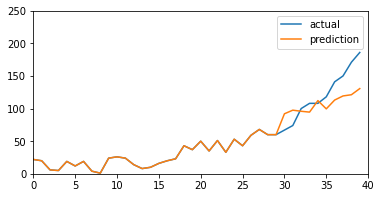

In [99]:
plt.figure(figsize=(6,3))
plt.plot(actual[20] ,label='actual')
plt.plot(prediction[20], label='prediction')
plt.axis([0,40,0,250])
plt.legend()
plt.show()

In [164]:
from scipy.ndimage import gaussian_filter1d


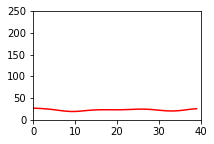

In [186]:
y_s1 = gaussian_filter1d(actual[0], sigma=3)
y_s2 = gaussian_filter1d(actual[7], sigma=3)
y_s3 = gaussian_filter1d(actual[51], sigma=3)
y_s4 = gaussian_filter1d(actual[89], sigma=3)

plt.figure(figsize=(3,2))
plt.plot(y_s4, color='red')
# plt.plot(actual[20])
plt.axis([0,40,0,250])
plt.show()

In [174]:
actual[0]

array([ 13.,   6.,   4.,   9.,   8.,  11.,   9.,  18.,  18.,  11.,   6.,
        10.,  26.,  10.,  26.,  44.,  78.,  74., 119., 135., 190., 164.,
       183., 179., 139., 194., 164., 159., 181., 181., 171., 170., 184.,
       182., 198., 175., 183., 208., 212., 227.])

In [177]:
# plt.subplot(2,2,1)
# plt.plot(y_s1, color='red')
# plt.xticks([0,20,40])
# plt.yticks([0,50,100,150,200,250])
# plt.show()

# plt.subplot(2,2,2)
# plt.xticks([0,40])
# plt.yticks([0,50,100,150,200,250])
# plt.plot(y_s2, color='red')

# plt.subplot(2,2,3)
# plt.xticks([0,40])
# plt.yticks([0,50,100,150,200,250])
# plt.plot(y_s3, color='red')

# plt.subplot(2,2,4)
# plt.xticks([0,20,40])
# plt.yticks([0,50,100,150,200,250])
# plt.plot(y_s4, color='red')

In [178]:
# plt.subplots(2,2,sharex=True,sharey=True)